In [116]:
# load data
import numpy as np
import pandas as pd
with open("AmesHousing.txt",'r') as file:
    data = [line.strip().split('\t') for line in file]

data=np.asarray(data)
print('data shape:',data.shape)
data=pd.DataFrame(data,columns=data[0,:])


data shape: (2931, 82)


In [117]:
col_num=['Lot Area','Lot Frontage','Year Built', \
'Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2', \
'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', \
'2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', \
'Garage Area', 'Wood Deck SF', 'Open Porch SF', \
'Enclosed Porch', '3Ssn Porch', 'Screen Porch', \
'Pool Area']
col_cat=['MS SubClass', 'MS Zoning', 'Street', \
'Alley', 'Lot Shape', 'Land Contour', \
'Utilities', 'Lot Config', 'Land Slope', \
'Neighborhood', 'Condition 1', 'Condition 2', \
'Bldg Type', 'House Style', 'Overall Qual', \
'Overall Cond', 'Roof Style', 'Roof Matl', \
'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', \
'Exter Qual', 'Exter Cond', 'Foundation', \
'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', \
'BsmtFin Type 1', 'Heating', 'Heating QC', \
'Central Air', 'Electrical', 'Bsmt Full Bath', \
'Bsmt Half Bath', 'Full Bath', 'Half Bath', \
'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', \
'TotRms AbvGrd', 'Functional', 'Fireplaces', \
'Fireplace Qu', 'Garage Type', 'Garage Cars', \
'Garage Qual', 'Garage Cond', 'Paved Drive', \
'Pool QC', 'Fence', 'Sale Type', 'Sale Condition']
label=['SalePrice']

X_num = data[:][col_num]
X_cat = data[:][col_cat]
y_label=data[:][label]
X_num=X_num.fillna(0)
X_cat=X_cat.fillna('NA')
y_label=y_label.fillna(0)
data=pd.concat([X_num, X_cat,y_label], axis=1, sort=False)
data=np.asarray(data)
features=data[0,:71]
print(data.shape)

(2931, 72)


In [118]:
# data split
n = int((len(data)-1)/5)
m = len(data[0])
validSet = np.empty((n,m), dtype='object')
testSet = np.empty((n,m), dtype='object')
trainSet = np.empty((n*3,m), dtype='object')
idx=0
for i in range(1,len(data)):
    if  (i%5)==3: 
        validSet[int(i/5),:]=data[i,:]
    elif (i%5)==4:
        testSet[int(i/5)]=data[i,:]
    else:
        trainSet[idx]=data[i,:] 
        idx=idx+1
print('train set:',len(trainSet))
print('validation set:',len(validSet))
print('test set:',len(testSet))

train set: 1758
validation set: 586
test set: 586


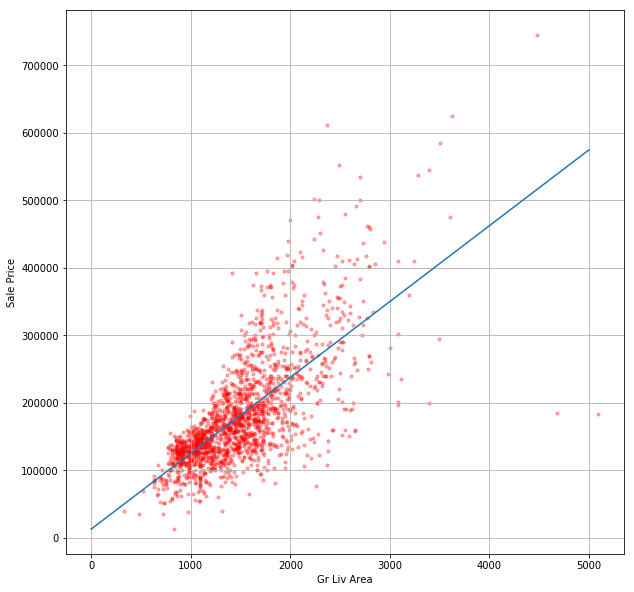

model: y= 112.41373299203372 x +  12662.054191172996
RMSE for validation set: 57184.150591500715


In [119]:
# linear regression for one feature

train_X=np.asarray([int(s) for s in trainSet[:,11]]).reshape(1758,1) # Gr Liv Area
train_y=np.asarray([int(s) for s in trainSet[:,71]]).reshape(1758,1)

numer = 0
denom = 0
mean_x=np.mean(train_X)
mean_y=np.mean(train_y)
for i in range(1758):
    numer += (train_X[i] - mean_x) * (train_y[i] - mean_y)
    denom += (train_X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_X,train_y, c='r', s=10.0, alpha=0.3, label="Gr Liv Area")
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
ax.grid()

x = np.linspace(0,5000,5001)
y = np.zeros((5001,1))
for i in range(5001):
    y[i] = b1*x[i]+b0
ax.plot(x,y)
plt.show()

print('model:','y=',float(b1),'x + ',float(b0))

# RMSE for validation set

valid_X=np.asarray([int(s) for s in validSet[:,11]]).reshape(586,1) # Gr Liv Area
valid_y=np.asarray([int(s) for s in validSet[:,71]]).reshape(586,1) # Sale Price
predict = np.zeros((586,1))
square_sum=0
for i in range(586):
    predict[i] = b1*valid_X[i]+b0
    square_sum = square_sum+(predict[i]-valid_y[i]) ** 2
print('RMSE for validation set:',float(np.sqrt(square_sum/568)))
    

In [120]:
# one hot encoding 
from sklearn import preprocessing
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from math import sqrt

X = pd.DataFrame(data[1:,:71],columns=features)
y = pd.DataFrame(data[1:,71])

X_num = X[:][col_num]        
X_cat = X[:][col_cat]

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder(categories='auto')
# 2. FIT
enc.fit(X_cat)
# 3. Transform
onehotenc = enc.transform(X_cat).toarray()
X_cat_new = pd.DataFrame(onehotenc)
X = pd.concat([X_num, X_cat_new], axis=1, sort=False)

for feature in col_num:
    X[feature] = pd.to_numeric(X[feature], errors='coerce').fillna(0).astype(np.int64)

model = skl.linear_model.LinearRegression()

X = X.values # to nd array
y = y.values
n = int(len(X)/5)
m = len(X[0])
idx = 0
newX_valid = np.empty((n,m), dtype='object')
newX_test = np.empty((n,m), dtype='object')
newX_train = np.empty((n*3,m), dtype='object')
newy_valid = np.empty((n,1), dtype='object')
newy_test = np.empty((n,1), dtype='object')
newy_train = np.empty((n*3,1), dtype='object')
for i in range(len(X)):
    if  (i%5)==3: 
        newX_valid[int(i/5),:]=X[i,:]
        newy_valid[int(i/5)]=y[i]
    elif (i%5)==4:
        newX_test[int(i/5)]=X[i,:]
        newy_test[int(i/5),:]=y[i]
    else:
        newX_train[idx]=X[i,:] 
        newy_train[idx]=y[i]
        idx=idx+1

model.fit(newX_train,newy_train)

valid_predict = model.predict(newX_valid)

print('RMSE for validation set:',sqrt(skl.metrics.mean_squared_error(newy_valid,valid_predict)))


RMSE for validation set: 36974.82747792334


a= 50.0 
 RMSE for training data: [24150.185718555676] 
 RMSE for valid data: [34633.261378916206]
a= 100.0 
 RMSE for training data: [28715.054577126983] 
 RMSE for valid data: [35135.493973640136]
a= 150.0 
 RMSE for training data: [32846.46998650311] 
 RMSE for valid data: [35706.422038458426]
a= 200.0 
 RMSE for training data: [35826.41755565205] 
 RMSE for valid data: [36619.932642134794]
a= 250.0 
 RMSE for training data: [37968.46677768008] 
 RMSE for valid data: [37652.53686905899]
a= 300.0 
 RMSE for training data: [39723.12347634224] 
 RMSE for valid data: [38930.1875845693]
a= 350.0 
 RMSE for training data: [41646.781631087724] 
 RMSE for valid data: [40420.648028772805]
a= 400.0 
 RMSE for training data: [43524.06833092644] 
 RMSE for valid data: [41931.80665675973]
a= 450.0 
 RMSE for training data: [45372.806416818246] 
 RMSE for valid data: [43411.387388997384]
a= 500.0 
 RMSE for training data: [47294.07278966276] 
 RMSE for valid data: [44995.98009362166]


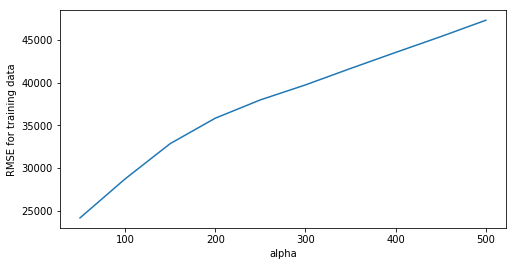

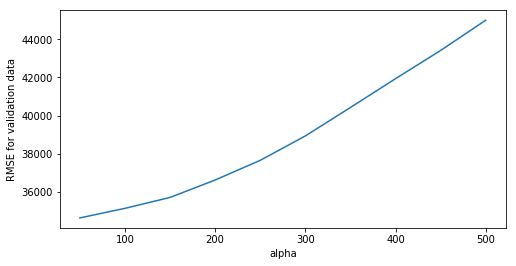

In [139]:
# L1 regression:
from sklearn.linear_model import Lasso
alpha = np.linspace(50,500,10)
idx=0
RMSE1 = np.empty((10,1), dtype='object')
RMSE2 = np.empty((10,1), dtype='object')
for a in alpha:
    lassoreg = Lasso(alpha=a,normalize=True,max_iter=1e5)
    lassoreg.fit(newX_train,newy_train)
    y_predict1 = lassoreg.predict(newX_train)
    RMSE1[idx] = sqrt(skl.metrics.mean_squared_error(newy_train,y_predict1))
    y_predict2 = lassoreg.predict(newX_valid)
    RMSE2[idx] = sqrt(skl.metrics.mean_squared_error(newy_valid,y_predict2))
    print('a=',a,'\n','RMSE for training data:',RMSE1[idx],'\n','RMSE for valid data:',RMSE2[idx])
    idx=idx+1

plt.figure(figsize=(8,4))
plt.plot(alpha,RMSE1)
plt.xlabel('alpha')
plt.ylabel('RMSE for training data')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(alpha,RMSE2)
plt.xlabel('alpha')
plt.ylabel('RMSE for validation data')
plt.show()
